In [241]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load Dataset

In [242]:
df = pd.read_csv('Mall_Customers .csv')

# Data Understanding

In [243]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [245]:
df.shape

(200, 5)

In [246]:
df.shape[0]# returns number of rows

200

In [247]:
df.shape[1] # returns number of columns

5

In [248]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Look at the min, max, mean, and std for each numeric column.
Values that are far from the mean could be outliers.
Here we can see that the maximum annual income is much higher than the mean.

In [249]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Data Cleaning and Preprocessing

In [250]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

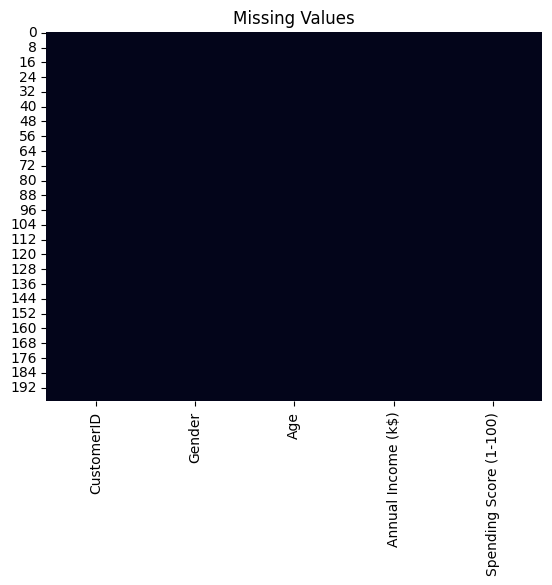

In [251]:
sns.heatmap(df.isnull(),cbar=False) #cbar=False removes the color bar, making the plot cleaner.
plt.title("Missing Values"); 
plt.show()

In [252]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [253]:
duplicate=df.duplicated().sum()
print(duplicate)

0


In [254]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis(EDA)

### Univariate Analysis

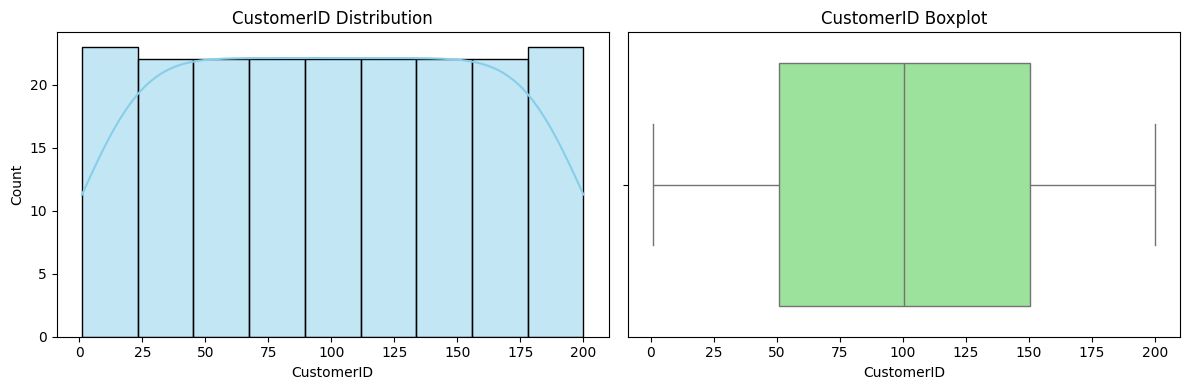

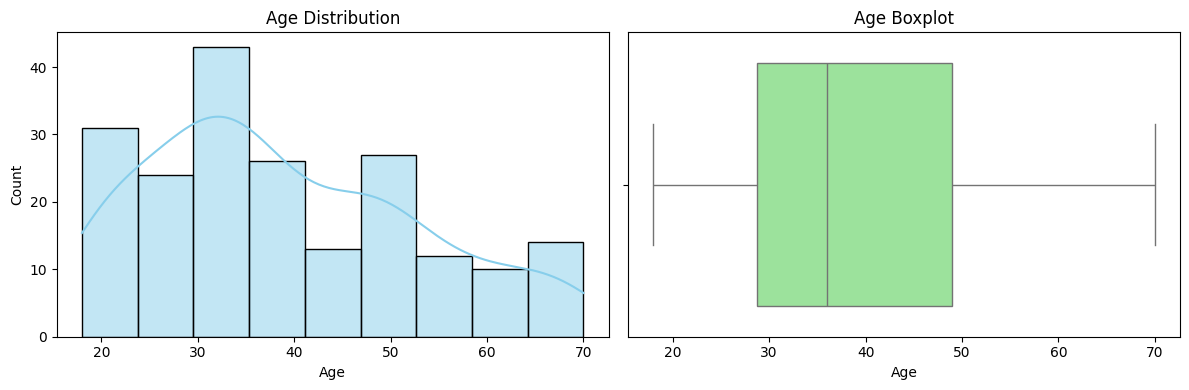

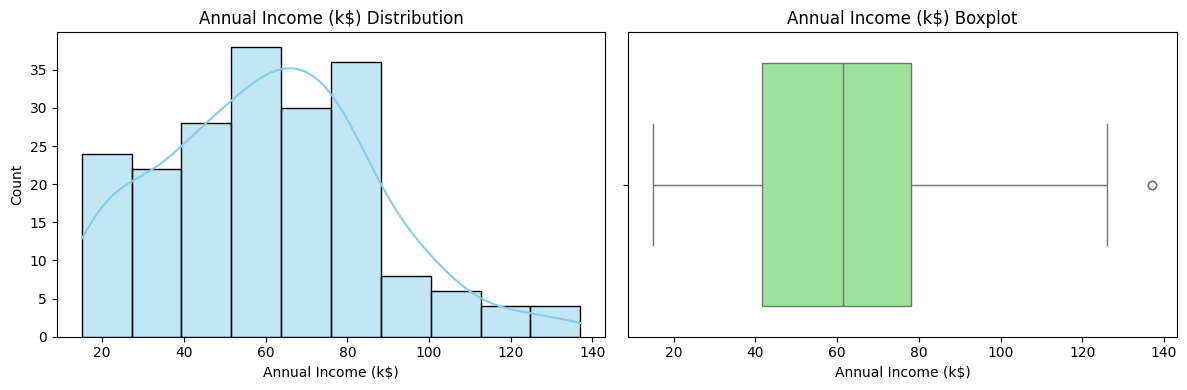

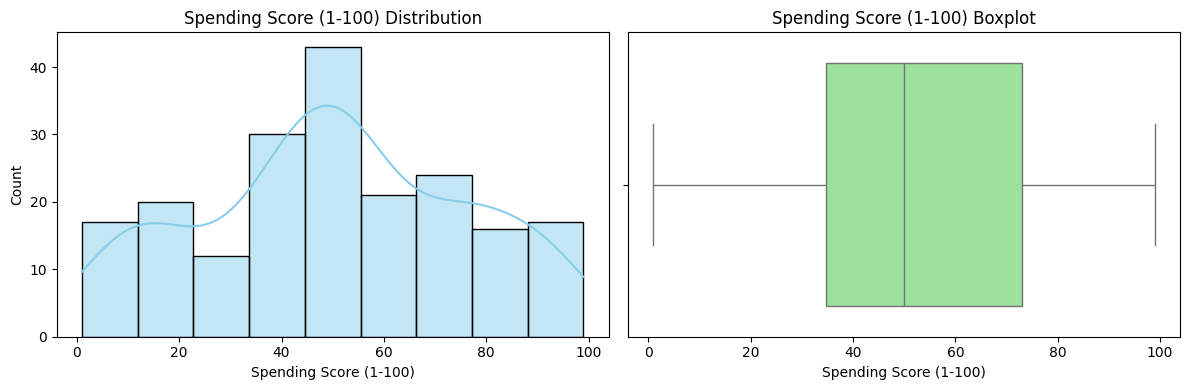

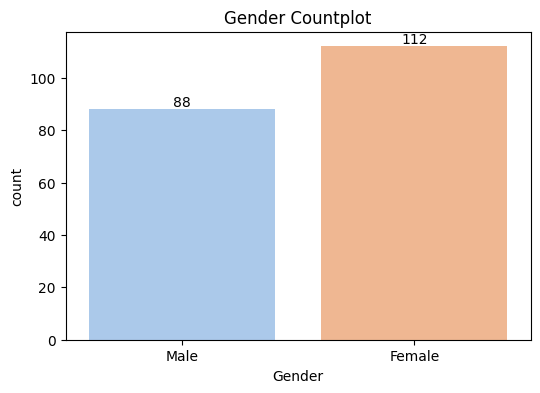

In [255]:
# Numeric columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

for col in num_cols:
    plt.figure(figsize=(12,4))
    
    # Distribution
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"{col} Distribution")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} Boxplot")
    
    plt.tight_layout()
    plt.show()

# Categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=df[col], palette='pastel')
    
    # Annotate bars
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center',
            va='bottom'
        )
    
    plt.title(f"{col} Countplot")
    plt.show()



### Bivariate Analysis


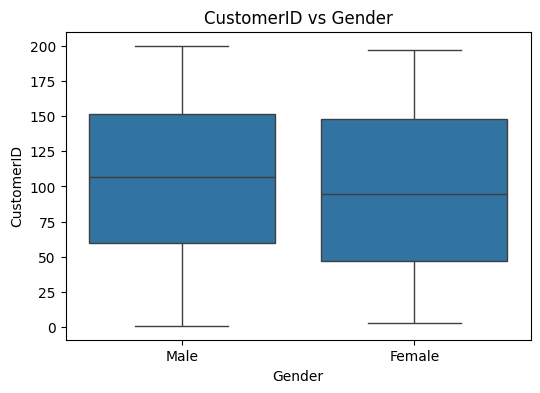

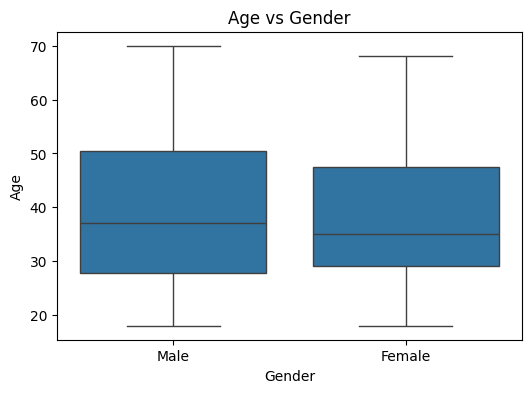

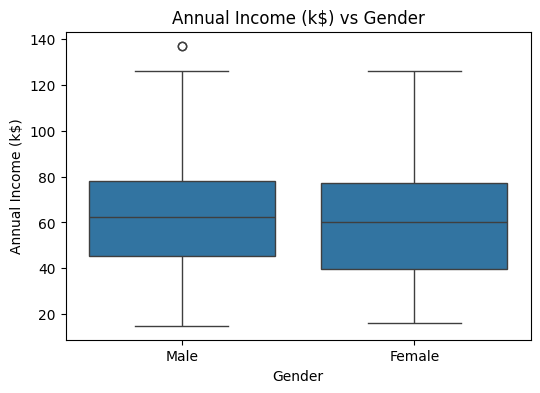

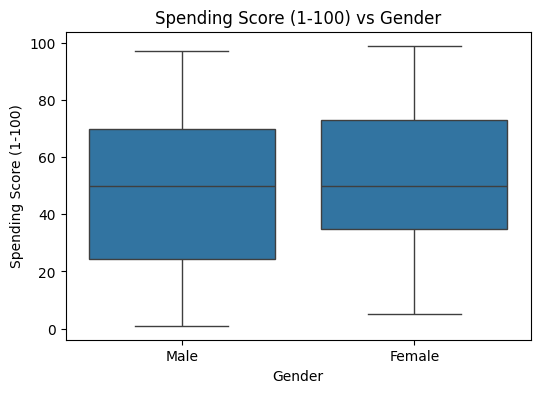

In [256]:

for col in num_cols:
    for cat in cat_cols:
        plt.figure(figsize=(6,4)); 
        sns.boxplot(x=df[cat], y=df[col]); 
        plt.title(f"{col} vs {cat}"); 
        plt.show()

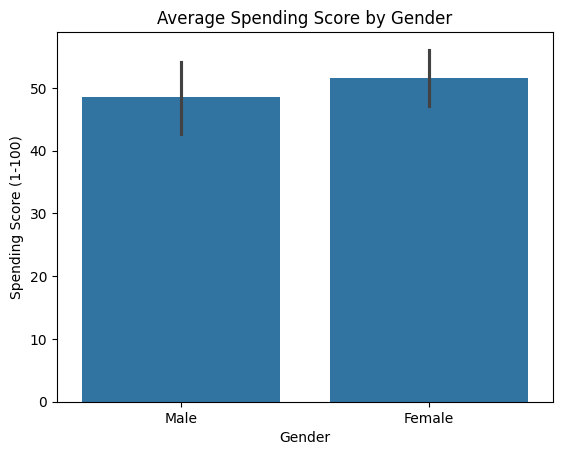

In [257]:
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df) #x = categorical, y= numerical
plt.title("Average Spending Score by Gender")
plt.show()

Female customers are higher in number than male customers.
This suggests the mall may attract more female shoppers or female customers visit more frequently.

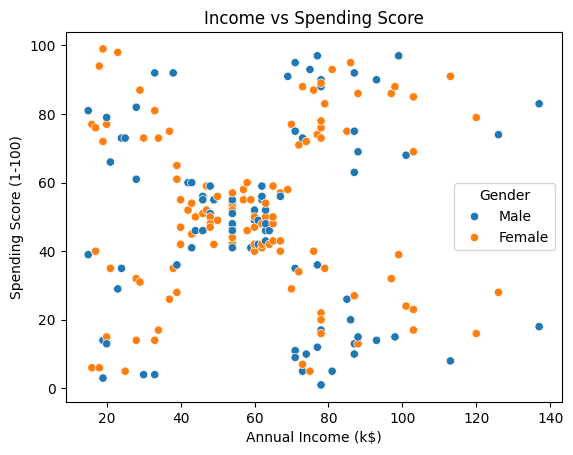

In [258]:

# Annual Income vs Spending Score, colored by Gender
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=df, hue='Gender')
plt.title("Income vs Spending Score")
plt.show()


### Multivariate Analysis

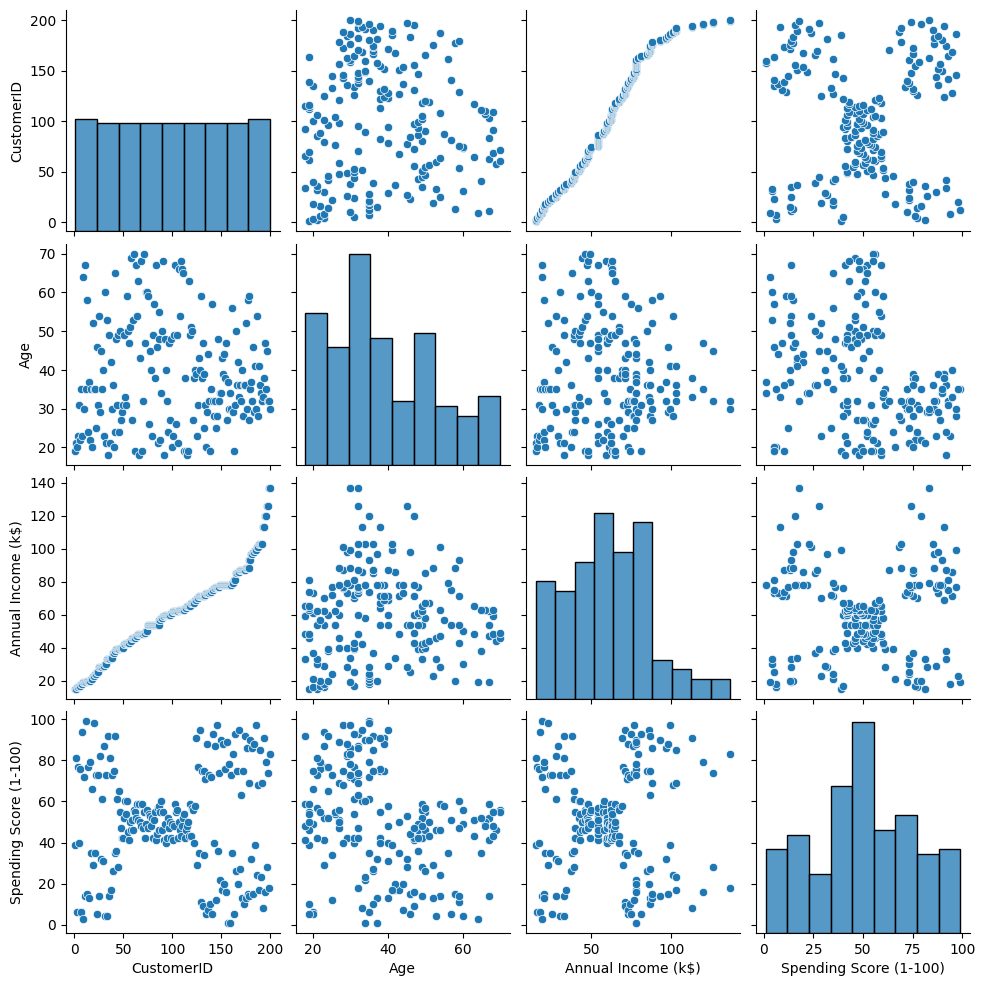

In [259]:
sns.pairplot(df[num_cols]); 
plt.show()

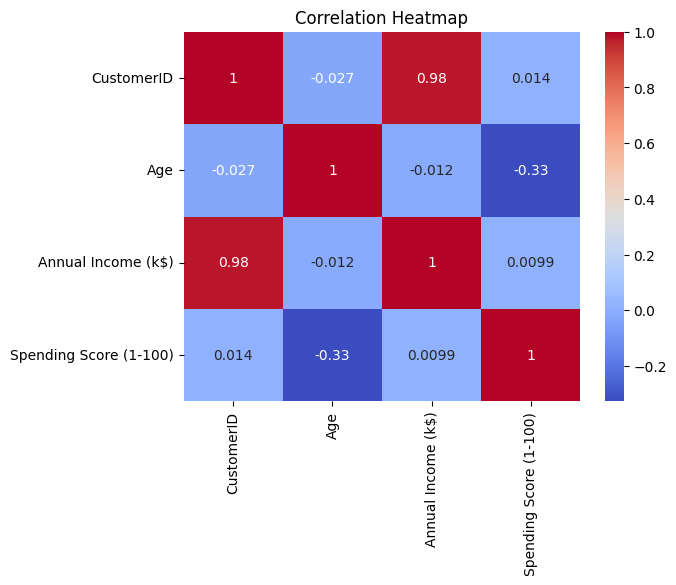

In [260]:
# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the analysis, it is evident that the Annual Income column contains some outlier values.

## Encoding

In [261]:
#Keep both columns (Female and Male)
# df=pd.get_dummies(df,columns=['Gender'],drop_first=False)
#If you want single column (Gender)
# df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [262]:
#One-Hot Encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

one_encoder=OneHotEncoder(sparse_output=False,drop='first')
encoded_array = one_encoder.fit_transform(df[['Gender']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array,columns=one_encoder.get_feature_names_out(['Gender']))
print(encoded_df)

     Gender_Male
0            1.0
1            1.0
2            0.0
3            0.0
4            0.0
..           ...
195          0.0
196          0.0
197          1.0
198          1.0
199          1.0

[200 rows x 1 columns]


In [263]:
#Combine with numeric columns
df_encoded = pd.concat([df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].reset_index(drop=True), encoded_df], axis=1)
print(df_encoded.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39          1.0
1   21                  15                      81          1.0
2   20                  16                       6          0.0
3   23                  16                      77          0.0
4   31                  17                      40          0.0


# Detecting and Removing  Outliers

In [264]:
Q1=df_encoded['Annual Income (k$)'].quantile(0.25)
Q3=df_encoded['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
lower_bond = Q1-1.5*IQR
Upper_bond = Q3+1.5*IQR

outliers=df_encoded[(df_encoded['Annual Income (k$)']<lower_bond)| (df_encoded['Annual Income (k$)']>Upper_bond)]
print(outliers)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
198   32                 137                      18          1.0
199   30                 137                      83          1.0


In [265]:
# df_encoded['Annual Income (k$)'] = df_encoded['Annual Income (k$)'].clip(lower_bound, upper_bound)

#Limit the income to the upper bound:
df_encoded['Annual Income (k$)'] = df_encoded['Annual Income (k$)'].clip(upper=Upper_bond)  # upper bound from IQR



In [266]:
print(df_encoded[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']].skew())



Age                       0.485569
Annual Income (k$)        0.291249
Spending Score (1-100)   -0.047220
Gender_Male               0.243578
dtype: float64


In [267]:
# | Column                 | Skew  | Interpretation                          |
# | ---------------------- | ----- | --------------------------------------- |
# | Age                    | 0.49  | Slightly right-skewed, almost symmetric |
# | Annual Income (k$)     | 0.32  | Slightly right-skewed, minor skew       |
# | Spending Score (1-100) | -0.05 | Almost symmetric                        |
# | Gender_Male            | 0.24  | Almost symmetric / binary column        |

*Observation:*

#Values between -0.5 and 0.5 are generally considered approximately symmetric.

- Almost all columns are approximately symmetric.  
- No extreme skewness or significant outliers are present.  
- Therefore, we can proceed to K-Means clustering without transforming or capping numeric features.


In [268]:
df_encoded.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.517500,50.200000,0.440000
std,13.969007,26.143551,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,132.750000,99.000000,1.000000


count    200.000000
mean      60.517500
std       26.143551
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      132.750000
Name: Annual Income (k$), dtype: float64


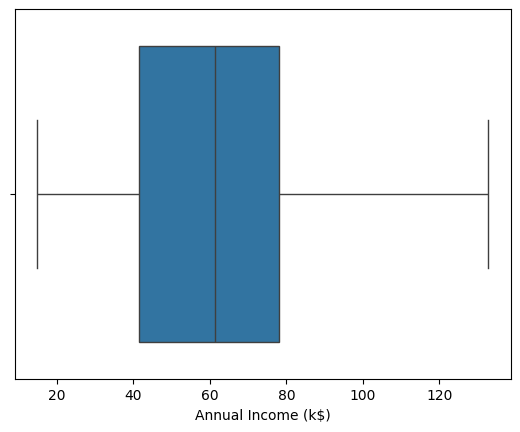

In [269]:
print(df_encoded['Annual Income (k$)'].describe())
sns.boxplot(x=df_encoded['Annual Income (k$)'])
plt.show()


Observation

After applying IQR-based outlier capping, the maximum Annual Income was reduced from extreme values to 132.75, keeping all other values intact.

The distribution of incomes is now more balanced, with no extreme outliers that could distort clustering.

The mean income is 60.52, and the standard deviation is 26.14, indicating a moderate spread in customer incomes.

Percentiles (Q1 = 41.5, Median = 61.5, Q3 = 78) show that the majority of customer incomes lie within a reasonable range.



In [270]:
#Standarization
from sklearn.preprocessing import StandardScaler
Standard_scaler=StandardScaler()
scaled_data=Standard_scaler.fit_transform(df_encoded)
print(scaled_data)

[[-1.42456879 -1.74542941 -0.43480148  1.12815215]
 [-1.28103541 -1.74542941  1.19570407  1.12815215]
 [-1.3528021  -1.70708307 -1.71591298 -0.88640526]
 [-1.13750203 -1.70708307  1.04041783 -0.88640526]
 [-0.56336851 -1.66873673 -0.39597992 -0.88640526]
 [-1.20926872 -1.66873673  1.00159627 -0.88640526]
 [-0.27630176 -1.6303904  -1.71591298 -0.88640526]
 [-1.13750203 -1.6303904   1.70038436 -0.88640526]
 [ 1.80493225 -1.59204406 -1.83237767  1.12815215]
 [-0.6351352  -1.59204406  0.84631002 -0.88640526]
 [ 2.02023231 -1.59204406 -1.4053405   1.12815215]
 [-0.27630176 -1.59204406  1.89449216 -0.88640526]
 [ 1.37433211 -1.55369772 -1.36651894 -0.88640526]
 [-1.06573534 -1.55369772  1.04041783 -0.88640526]
 [-0.13276838 -1.55369772 -1.44416206  1.12815215]
 [-1.20926872 -1.55369772  1.11806095  1.12815215]
 [-0.27630176 -1.51535138 -0.59008772 -0.88640526]
 [-1.3528021  -1.51535138  0.61338066  1.12815215]
 [ 0.94373197 -1.43865871 -0.82301709  1.12815215]
 [-0.27630176 -1.43865871  1.85

In [271]:
#scaled_data is a NumPy array,Convert them into DataFrame

scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
print(scaled_df.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.745429               -0.434801     1.128152
1 -1.281035           -1.745429                1.195704     1.128152
2 -1.352802           -1.707083               -1.715913    -0.886405
3 -1.137502           -1.707083                1.040418    -0.886405
4 -0.563369           -1.668737               -0.395980    -0.886405


In [272]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
Nomral_scaler= MinMaxScaler()
normalized_data =Nomral_scaler.fit_transform(scaled_df)
print(normalized_data)


[[0.01923077 0.         0.3877551  1.        ]
 [0.05769231 0.         0.81632653 1.        ]
 [0.03846154 0.00849257 0.05102041 0.        ]
 [0.09615385 0.00849257 0.7755102  0.        ]
 [0.25       0.01698514 0.39795918 0.        ]
 [0.07692308 0.01698514 0.76530612 0.        ]
 [0.32692308 0.02547771 0.05102041 0.        ]
 [0.09615385 0.02547771 0.94897959 0.        ]
 [0.88461538 0.03397028 0.02040816 1.        ]
 [0.23076923 0.03397028 0.7244898  0.        ]
 [0.94230769 0.03397028 0.13265306 1.        ]
 [0.32692308 0.03397028 1.         0.        ]
 [0.76923077 0.04246285 0.14285714 0.        ]
 [0.11538462 0.04246285 0.7755102  0.        ]
 [0.36538462 0.04246285 0.12244898 1.        ]
 [0.07692308 0.04246285 0.79591837 1.        ]
 [0.32692308 0.05095541 0.34693878 0.        ]
 [0.03846154 0.05095541 0.66326531 1.        ]
 [0.65384615 0.06794055 0.28571429 1.        ]
 [0.32692308 0.06794055 0.98979592 0.        ]
 [0.32692308 0.07643312 0.34693878 1.        ]
 [0.13461538 

In [273]:
#Convert Normalized array data to DataFrame

normalized_df=pd.DataFrame(normalized_data,columns=scaled_df.columns)
print(normalized_df)

          Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0    0.019231            0.000000                0.387755          1.0
1    0.057692            0.000000                0.816327          1.0
2    0.038462            0.008493                0.051020          0.0
3    0.096154            0.008493                0.775510          0.0
4    0.250000            0.016985                0.397959          0.0
..        ...                 ...                     ...          ...
195  0.326923            0.891720                0.795918          0.0
196  0.519231            0.942675                0.275510          0.0
197  0.269231            0.942675                0.744898          1.0
198  0.269231            1.000000                0.173469          1.0
199  0.230769            1.000000                0.836735          1.0

[200 rows x 4 columns]


# KMeans Clustering Modeling

In [274]:
from sklearn.cluster import KMeans

In [275]:
normalized_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

### 1. Elbow Method

In [276]:

# numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']
numeric_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
X=normalized_df[numeric_cols]         # All the numeric  columns


wcss=[] # WCSS--> Within Cluster sum of squares

for k in range(1,10): #testing 1 to 10 clusters
    K_means =KMeans(n_clusters=k,init='k-means++',random_state=42)
    K_means.fit(X)
    wcss.append(K_means.inertia_) # here inertia gives wcss
print("WCSS values:",wcss)

WCSS values: [23.627381321006872, 14.57992736436853, 9.394273651281344, 6.276695529846631, 3.665274881528351, 3.4904931209791608, 2.9854654512441927, 2.4827372376774512, 2.313476299803857]


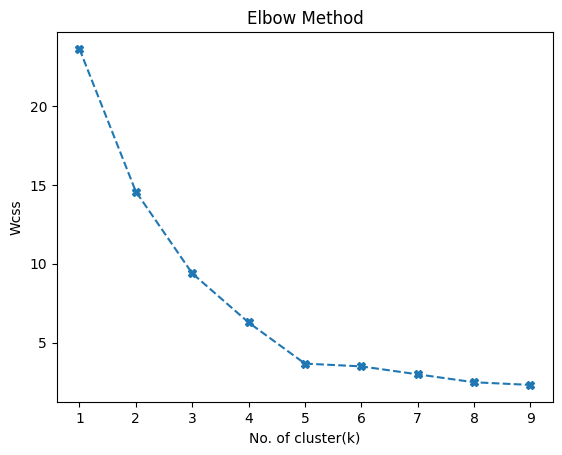

In [277]:
plt.Figure(figsize=(10,6))
plt.plot(range(1,10),wcss,linestyle='--',marker='X')
plt.title("Elbow Method")
plt.xlabel("No. of cluster(k)")
plt.ylabel('Wcss')
plt.xticks(range(1,10))
plt.show()

Observation: Elbow Method

The Elbow Method was used to determine the optimal number of clusters for K-Means clustering.

We plotted WCSS (Within-Cluster Sum of Squares) against different values of k (number of clusters).

The plot shows a sharp decrease in WCSS up to k = 5, after which the rate of decrease slows down.

This point, where the curve starts to flatten, is called the “elbow”.

Therefore, k = 5 is chosen as the optimal number of clusters for our dataset.

### 2. K-Means with the Optimal k

In [278]:
X=normalized_df[numeric_cols] # All the numeric columns

optimal_k = 5
K_means = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_means = K_means.fit_predict(X)  # This gives cluster labels fit_predict() → assigns cluster to existing data
y_means


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [279]:
#Centroid in Cluster

centroids = K_means.cluster_centers_  # Access centroids from the KMeans object
centroids_df = pd.DataFrame(centroids, columns=numeric_cols)
centroids_df


,Annual Income (k$),Spending Score (1-100)
0,0.340531,0.493405
1,0.606620,0.827839
2,0.091102,0.799629
3,0.620625,0.164431
4,0.091102,0.196197


In [280]:
X['Cluster'] = y_means # cluster labels as a new column in dataframe

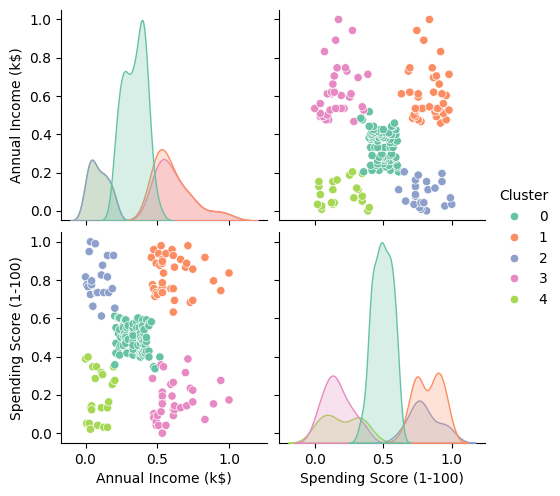

In [281]:
sns.pairplot(X, vars=numeric_cols, hue='Cluster', palette='Set2')
plt.show()

In [282]:
# Shows Data grouped in Different cluster
X.iloc[y_means==0] # shows data in Zero(0) cluster
X.iloc[y_means==1] # shows data in Zero(0) cluster
X.iloc[y_means==2] # shows data in Zero(0) cluster
X.iloc[y_means==3] # shows data in Zero(4) cluster
X.iloc[y_means==4] # shows data in Zero(4) cluster

,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,4
2,0.008493,0.051020,4
4,0.016985,0.397959,4
6,0.025478,0.051020,4
8,0.033970,0.020408,4
10,0.033970,0.132653,4
12,0.042463,0.142857,4
14,0.042463,0.122449,4
16,0.050955,0.346939,4
18,0.067941,0.285714,4


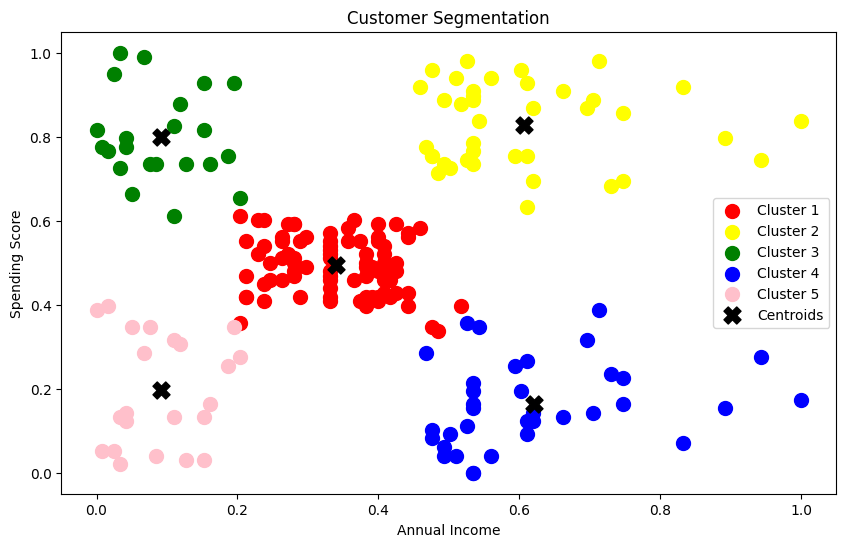

In [283]:
plt.figure(figsize=(10,6))

# Cluster 0 and Column 0 & 1
plt.scatter(X.iloc[y_means==0, 0], X.iloc[y_means==0, 1], s=100, c='red', label='Cluster 1')

# Cluster 1 and Column 0 & 1
plt.scatter(X.iloc[y_means==1, 0], X.iloc[y_means==1, 1], s=100, c='yellow', label='Cluster 2')

# Cluster 2 and Column 0 & 1
plt.scatter(X.iloc[y_means==2, 0], X.iloc[y_means==2, 1], s=100, c='green', label='Cluster 3')

# Cluster 3 and Column 0 & 1
plt.scatter(X.iloc[y_means==3, 0], X.iloc[y_means==3, 1], s=100, c='blue', label='Cluster 4')

# Cluster 4 and Column 0 & 1
plt.scatter(X.iloc[y_means==4, 0], X.iloc[y_means==4, 1], s=100, c='pink', label='Cluster 5')

plt.scatter(K_means.cluster_centers_[:, 0], K_means.cluster_centers_[:, 1],s=150, c='black', marker='X', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


## Cluster Observation (Based on  Output)

### Cluster 0 — Older age, low income, mid-level spenders

Age: High

Income: Low

Spending: Medium
Interpretation:
These are older customers with limited income but moderate spending. They may be loyal or necessity-driven buyers.



### Cluster 1 — Young, high income, very high spenders (Premium customers)

Age: Low

Income: High

Spending: Very High
Interpretation:
These are ideal premium customers — high purchasing power and high spending behaviour.
Perfect for targeted marketing.

### Cluster 2 — Older, very low income, very low spending

Age: High
Income: Very Low
Spending: Very Low
Interpretation:
These are budget-restricted customers. They may not be a profitable segment.

### Cluster 3 — Middle-aged, high income, very low spending

Age: Medium
Income: High
Spending: Low
Interpretation:
These are high-income conservative shoppers — they have money but don’t spend much.
You can target them with offers, loyalty schemes, or promotions.

### Cluster 4 — Very young, low income, high spending

Age: Very Low
Income: Low
Spending: High
Interpretation:
These are youth impulse buyers — low income but spend a lot.
Useful for marketing small, trendy, low-cost products.

📌 Summary in One Line


2 high-spending clusters (1 & 4)

2 low-spending clusters (2 & 3)

1 intermediate cluster (0)

Cluster 1 is the most profitable segment.

In [284]:
cluster_names = {
    0: 'Older Moderate Spenders',
    1: 'Young High Spenders',
    2: 'Middle-aged Low Spenders',
    3: 'Middle-aged High Income Low Spenders',
    4: 'Young Moderate Income High Spenders'
}

X['Cluster_Name'] = X['Cluster'].map(cluster_names)
print(X[['Cluster', 'Cluster_Name']].head())


   Cluster                         Cluster_Name
0        4  Young Moderate Income High Spenders
1        2             Middle-aged Low Spenders
2        4  Young Moderate Income High Spenders
3        2             Middle-aged Low Spenders
4        4  Young Moderate Income High Spenders


In [285]:
 #Evaluation of Clustering

from sklearn.metrics import silhouette_score
# score = silhouette_score(X[numeric_cols], y_means)
score = silhouette_score(normalized_df[numeric_cols], y_means)
print(score)

0.5609547442681548


Interpretation of Silhouette Score

Range: -1 to 1

Close to 1 → well-separated clusters, dense and clearly distinct.

Around 0 → overlapping clusters, not very distinct.

Negative → points assigned to the wrong clusters.

0.56 means:

Clusters are moderately separated, not perfect but not terrible.

Some overlap exists between clusters — common in customer segmentation data.

We can refine features or try other clustering methods (like DBSCAN or Hierarchical) to improve separation.

In [286]:
cluster_no = K_means.predict([[25,40]]) #predict() → assigns cluster to new/unseen data
print(cluster_no)

[1]


### Age=25, Income=40, Spending=60, Gender=1
### K_means.predict([[25, 40]]) Since our K_means  is trained on two features so we choose two value to check which cluster it belongs to.
### It show CLUSTER=1 for this provide data.

# Save The Model

In [287]:
import pickle 

In [288]:

 #open('file.pkl', 'wb') opens the file in binary write mode
#pickle.dump(obj, file) writes the Python object obj to the file.
#Using with open(...) as f: ensures the file is properly closed after loading.

with open('K_means.pkl', 'wb') as f:
    pickle.dump(K_means, f)